In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import h3
import h3pandas

# Analysis - Marstons

## Areas of interest
- Price
    - Price variance by category
    - Category price by location
- Location
    - Geographic spread of locations
- Hours
    - Distribution of hours - eat in
    - Distribution of hours - take away (inc lead time and pickup time)
    - Distribution of hours - by location

## Summary of future work
What more can be done in the future to enhance this work.
- Location classification
    - Use lat lng to find postcode and use this to define location as urban, suburban, rural
    - Use ONS data to further classify location types by affluence, population density, etc
- Location proximity analysis
    - What is the competitor density around our venues and how doe sthis impact footfall, average spend, transaction behaviour
- Location oportunity analysis
    - Where in the UK is there little compition and high opportunity? What makes a good opportunity?
- Menu analysis
    - How does this pricing compare to our pricing in nearby venues
    - Can the price be modelled and predicted using geographic and demographic data?
    - How does this offering compare to ours? Match products and create price indexes. Where are the gaps, where is the overlap?
- Product segmentation
    - Using product naming can we segment this into 'own brand' vs 'supplier' products and see how this impacts price
- Takeways
    - Is this the method for measuring takeaway or do they use another service EG Deliveroo?

In [120]:
base_dir = "C:/Users/robert.franklin/Desktop/local_projects/random/marstons"

In [121]:
# Export to parquet
address_df = pd.read_parquet(f"{base_dir}/data/processed/address.parquet")
takeaway_hours_df = pd.read_parquet(f"{base_dir}/data/processed/takeaway_hours.parquet")
eatin_hours_df = pd.read_parquet(f"{base_dir}/data/processed/eatin_hours.parquet")
category_item_links_df = pd.read_parquet(f"{base_dir}/data/processed/category_item_links.parquet")
items_df = pd.read_parquet(f"{base_dir}/data/processed/items.parquet")

In [122]:
# Investigate the data - address
print("shape", address_df.shape)
print("dtypes", address_df.dtypes)
address_df.head()

shape (505, 8)
dtypes streetAddress     object
address2          object
city              object
postCode          object
lng              float64
lat              float64
venue_id          object
name              object
dtype: object


,streetAddress,address2,city,postCode,lng,lat,venue_id,name
0,Elstree Way,Swindon,Wiltshire,SN25 4YX,-1.794249,51.598619,6241873934e4470009b5e396,Abbey Meads Swindon
1,Hyndburn Road,,Accrington,BB5 1PY,-2.372839,53.756492,5f2160931bae16000881b682,The Acorn - Accrington
2,Horeston Grange,Nuneaton,Warwickshire,CV11 6GU,-1.438402,52.526610,6241873a34e4470009b5e858,Acorn Nuneaton
3,Bristol Road,,Bridgwater,TA6 4TN,-2.986365,51.162220,5f293878cf81f70008aee2db,Admirals Table Bridgwater
4,105 Donald Street,,Cardiff,CF24 4TL,-3.170612,51.496147,6103ff3066b6210008c1236e,Albany Hotel


In [123]:
# Investigate the data - takeaway hours
print("shape", takeaway_hours_df.shape)
print("dtypes", takeaway_hours_df.dtypes)
takeaway_hours_df.head()

shape (3535, 8)
dtypes venue_id         object
day              object
is_open            bool
open             object
close            object
is_enabled         bool
min_lead_time     int64
pick_up_time      int64
dtype: object


,venue_id,day,is_open,open,close,is_enabled,min_lead_time,pick_up_time
0,6241873934e4470009b5e396,monday,True,09:00:00,21:45:00,False,20,10
1,6241873934e4470009b5e396,tuesday,True,09:00:00,21:45:00,False,20,10
2,6241873934e4470009b5e396,wednesday,True,09:00:00,21:45:00,False,20,10
3,6241873934e4470009b5e396,thursday,True,09:00:00,21:45:00,False,20,10
4,6241873934e4470009b5e396,friday,True,09:00:00,21:45:00,False,20,10


In [124]:
# Investigate the data - eatin hours
print("shape", eatin_hours_df.shape)
print("dtypes", eatin_hours_df.dtypes)
eatin_hours_df.head()

shape (3535, 6)
dtypes venue_id      object
day           object
is_open         bool
open          object
close         object
is_enabled      bool
dtype: object


,venue_id,day,is_open,open,close,is_enabled
0,6241873934e4470009b5e396,monday,True,11:00:00,21:30:00,True
1,6241873934e4470009b5e396,tuesday,True,11:00:00,21:30:00,True
2,6241873934e4470009b5e396,wednesday,True,11:00:00,21:30:00,True
3,6241873934e4470009b5e396,thursday,True,11:00:00,21:30:00,True
4,6241873934e4470009b5e396,friday,True,11:00:00,21:30:00,True


In [125]:
# Investigate the data - category link items
print("shape", category_item_links_df.shape)
print("dtypes", category_item_links_df.dtypes)
category_item_links_df.head()

shape (71685, 6)
dtypes venue_id         object
category_id      object
category_name    object
group_code       object
set_code         object
item_id          object
dtype: object


,venue_id,category_id,category_name,group_code,set_code,item_id
0,5f2160931bae16000881b682,63ec468fb9aa8f66ff6c9536,Breakfast T1,7235,9612,634e683e22ff35a45f648e99
1,5f2160931bae16000881b682,63ec468fb9aa8f66ff6c9536,Breakfast T1,7235,9612,634e683e22ff35a45f648ea4
2,5f2160931bae16000881b682,63ec468fb9aa8f66ff6c9536,Breakfast T1,7235,9612,634e683e22ff35a45f648ea7
3,5f2160931bae16000881b682,63ec468fb9aa8f66ff6c9536,Breakfast T1,7235,9612,634e683e22ff35a45f648ea9
4,5f2160931bae16000881b682,63ec468fb9aa8f66ff6c9536,Breakfast T1,7235,9612,634e683e22ff35a45f648e97


In [126]:
# Investigate the data - items
print("shape", items_df.shape)
print("dtypes", items_df.dtypes)
items_df.head()

shape (857562, 20)
dtypes item_id                      object
venue_id                     object
_id                          object
inStock                        bool
active                         bool
business                     object
venue                        object
sku                          object
name                         object
description                  object
customerShortDescription     object
customerLongDescription      object
price                       float64
restrictions                 object
__v                           int64
createdAt                    object
updatedAt                    object
ageRestricted                  bool
tags                         object
choiceGroups                 object
dtype: object


,item_id,venue_id,_id,inStock,active,business,venue,sku,name,description,customerShortDescription,customerLongDescription,price,restrictions,__v,createdAt,updatedAt,ageRestricted,tags,choiceGroups
0,626aa2222000f30009be1f63,5f2160931bae16000881b682,626aa2222000f30009be1f63,True,True,5efb1b60c1d51500073b7923,5f2160931bae16000881b682,1188,Cola 4oz Dash,Cola 4oz Dash,Cola 4oz,(49 kcal)\r\n,0.90,"{'minimumPurchaserAge': None, 'minimumWorkerAg...",1,2022-04-28T14:18:18.311Z,2022-09-01T01:23:49.704Z,False,[],None
1,626aa2222000f30009be1f64,5f2160931bae16000881b682,626aa2222000f30009be1f64,False,True,5efb1b60c1d51500073b7923,5f2160931bae16000881b682,1189,Diet Cola Dash 4oz,Diet Cola Dash 4oz,Diet Cola 4oz,(2 kcal)\r\n,0.85,"{'minimumPurchaserAge': None, 'minimumWorkerAg...",2,2022-04-28T14:18:18.312Z,2022-10-28T04:08:56.330Z,False,[],None
2,626aa2222000f30009be1f65,5f2160931bae16000881b682,626aa2222000f30009be1f65,False,True,5efb1b60c1d51500073b7923,5f2160931bae16000881b682,1190,Lemonade 4oz Dash,Lemonade 4oz Dash,Lemonade 4oz,(3 kcal)\r\n,0.85,"{'minimumPurchaserAge': None, 'minimumWorkerAg...",2,2022-04-28T14:18:18.312Z,2022-10-28T04:08:56.351Z,False,[],None
3,626aa2222000f30009be1f66,5f2160931bae16000881b682,626aa2222000f30009be1f66,True,True,5efb1b60c1d51500073b7923,5f2160931bae16000881b682,1192,Britvic Tonic 200ml,Britvic Tonic 200ml,Britvic Tonic 200ml,(41 kcal)\r\n,2.15,"{'minimumPurchaserAge': None, 'minimumWorkerAg...",1,2022-04-28T14:18:18.312Z,2022-09-01T01:23:49.921Z,False,[],"[626aa2222000f30009be26b3, 626aa2222000f30009b..."
4,626aa2222000f30009be1f67,5f2160931bae16000881b682,626aa2222000f30009be1f67,True,True,5efb1b60c1d51500073b7923,5f2160931bae16000881b682,1193,Britvic Slim Tonic 200ml,Britvic Slim Tonic 200ml,Britvic Slim Tonic 200ml,(3 kcal)\r\n,2.15,"{'minimumPurchaserAge': None, 'minimumWorkerAg...",1,2022-04-28T14:18:18.312Z,2022-10-27T13:48:14.255Z,False,[],"[626aa2222000f30009be26b3, 626aa2222000f30009b..."


## Price
    - Price variance by category
    - Category price by location

In [127]:
# For each category get the number of items and the number of stores avaiable in
item_cat_df = pd.merge(items_df[["item_id", "name", "venue_id", "active", "price", "restrictions"]], category_item_links_df[["item_id", "category_name"]], on="item_id", how="left")
print(f"{item_cat_df.category_name.isnull().sum():,}/{item_cat_df.shape[0]:,} items have no category")

787,785/859,470 items have no category


In [128]:
# Expand restrictions
item_cat_df["restrictions"] = [
        r.get("minimumPurchaserAge", 0)
        if r is not None else 0
        for r in item_cat_df.restrictions
    ]
item_cat_df["restrictions"] = item_cat_df["restrictions"].fillna(0)

In [129]:
# Investigate unknown category items
item_cat_df[item_cat_df.category_name.isnull()]["name"].drop_duplicates().sort_values()
# Found most are drink except where they start with SIG
item_cat_df.loc[(
    item_cat_df.category_name.isnull()
    & item_cat_df.name.str.startswith("SIG")
), "category_name"] = "SIG - Unknown"
# Found that drinks split into adult and soft
item_cat_df.loc[(
    item_cat_df.category_name.isnull()
    & (item_cat_df.restrictions >= 18)
), "category_name"] = "Drinks - Adult"
item_cat_df.loc[(
    item_cat_df.category_name.isnull()
    & (item_cat_df.restrictions < 18)
), "category_name"] = "Drinks - Soft"



In [130]:
# Label all null category items as "Drinks"
item_cat_df["category_name"] = item_cat_df.category_name.fillna("Unknown")

In [131]:
# How many categories are there and what are the stats by category
print(f"{item_cat_df.category_name.nunique():,} categories")
item_cat_df.groupby(["venue_id", "category_name"]) \
    .agg({"item_id": "count", "price": "mean"})\
        .reset_index() \
        .groupby("category_name") \
        .agg({"venue_id": "count", "item_id": "sum", "price": "mean"}) \
        .sort_values("venue_id", ascending=False) \
        .rename(columns={"venue_id": "num_stores", "item_id": "num_items", "price": "avg_price"})

52 categories


,num_stores,num_items,avg_price
category_name,,,
Drinks - Adult,503,524841,4.229406
Drinks - Soft,503,250089,2.482160
Starters & Sharers,380,8740,6.538707
Burgers,380,5320,10.892312
Salads,380,1140,11.120658
Lunch Offer,380,3800,6.548842
Jackets,380,2280,7.247061
Sides & Extras,295,2255,3.520032
Desserts,211,2437,6.041397


In [132]:
# Is there a 1-1 relationship for items and categories
item_cat_df.groupby("name") \
    .agg({"category_name": "nunique"}) \
    .rename(columns={"category_name": "num_categories"}) \
    .sort_values("num_categories", ascending=False)

,num_categories
name,
COM 23 Jam Sponge,5
COM 23 Chocolate Fudge Cake,5
COM 23 Apple Crumble,4
COM 23 VGN Apple Crumble,4
COM 23 Blood Orange Brownie,4
...,...
Courage Best Bitter Cask HF SH,1
Courage Best Bitter Cask PT,1
Courage Best Bitter Cask PT CD,1


In [133]:
# Look at geographic variations in prices of
# Drinks - Adult
# Drinks - Soft
# Food
# Create a super category
# Get the median price for each super category by store
item_cat_df["super_category"] = item_cat_df.category_name
item_cat_df.loc[
    ~item_cat_df.category_name.isin(["Drinks - Adult", "Drinks - Soft"]),
    "super_category"] = "Food"
venue_sup_cat_df = item_cat_df.groupby(["venue_id", "super_category"]) \
    .agg({"price": "median"}) \
    .reset_index()
venue_sup_cat_df

,venue_id,super_category,price
0,5efb6ace422ea50008a363a5,Drinks - Adult,3.90
1,5efb6ace422ea50008a363a5,Drinks - Soft,1.85
2,5efb6ace422ea50008a363a5,Food,7.25
3,5efc6ba78a35ff00088f4618,Drinks - Adult,4.05
4,5efc6ba78a35ff00088f4618,Drinks - Soft,1.80
...,...,...,...
1480,642d82dd0384b41d2d507442,Drinks - Soft,1.50
1481,642d82dd0384b41d2d507442,Food,5.75
1482,642d8adc1a0157a8349938f6,Drinks - Adult,3.80
1483,642d8adc1a0157a8349938f6,Drinks - Soft,1.70


In [134]:
# Join on the lat lng 
df = pd.merge(venue_sup_cat_df, address_df[["venue_id", "lat", "lng"]], on="venue_id", how="left")
df

,venue_id,super_category,price,lat,lng
0,5efb6ace422ea50008a363a5,Drinks - Adult,3.90,52.901715,-1.424691
1,5efb6ace422ea50008a363a5,Drinks - Soft,1.85,52.901715,-1.424691
2,5efb6ace422ea50008a363a5,Food,7.25,52.901715,-1.424691
3,5efc6ba78a35ff00088f4618,Drinks - Adult,4.05,53.442286,-2.914258
4,5efc6ba78a35ff00088f4618,Drinks - Soft,1.80,53.442286,-2.914258
...,...,...,...,...,...
1480,642d82dd0384b41d2d507442,Drinks - Soft,1.50,51.726641,-0.596777
1481,642d82dd0384b41d2d507442,Food,5.75,51.726641,-0.596777
1482,642d8adc1a0157a8349938f6,Drinks - Adult,3.80,52.703362,-2.750695
1483,642d8adc1a0157a8349938f6,Drinks - Soft,1.70,52.703362,-2.750695


In [135]:
# Create geopandas df for venues
resolution = 5
def geo_to_h3(row):
  return h3.geo_to_h3(lat=row.lat, lng=row.lng, resolution=resolution)

# Get the hexagons for each house
df['h3_polyfill'] = df.apply(geo_to_h3, axis=1)
# Agg by hexagon
df = df.groupby(['h3_polyfill', "super_category"], as_index=False).agg({'price':'mean'}) \
    [["price", "h3_polyfill", "super_category"]]
# Create the uk outline
uk = geopandas.read_file("uk_geo.json")
hexagons = uk.h3.polyfill_resample(resolution)
# Join to mapped data
hexagons = pd.merge(hexagons, df, on="h3_polyfill", how="left")


C:\Users\robert.franklin\AppData\Local\Temp\ipykernel_5184\3717702970.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


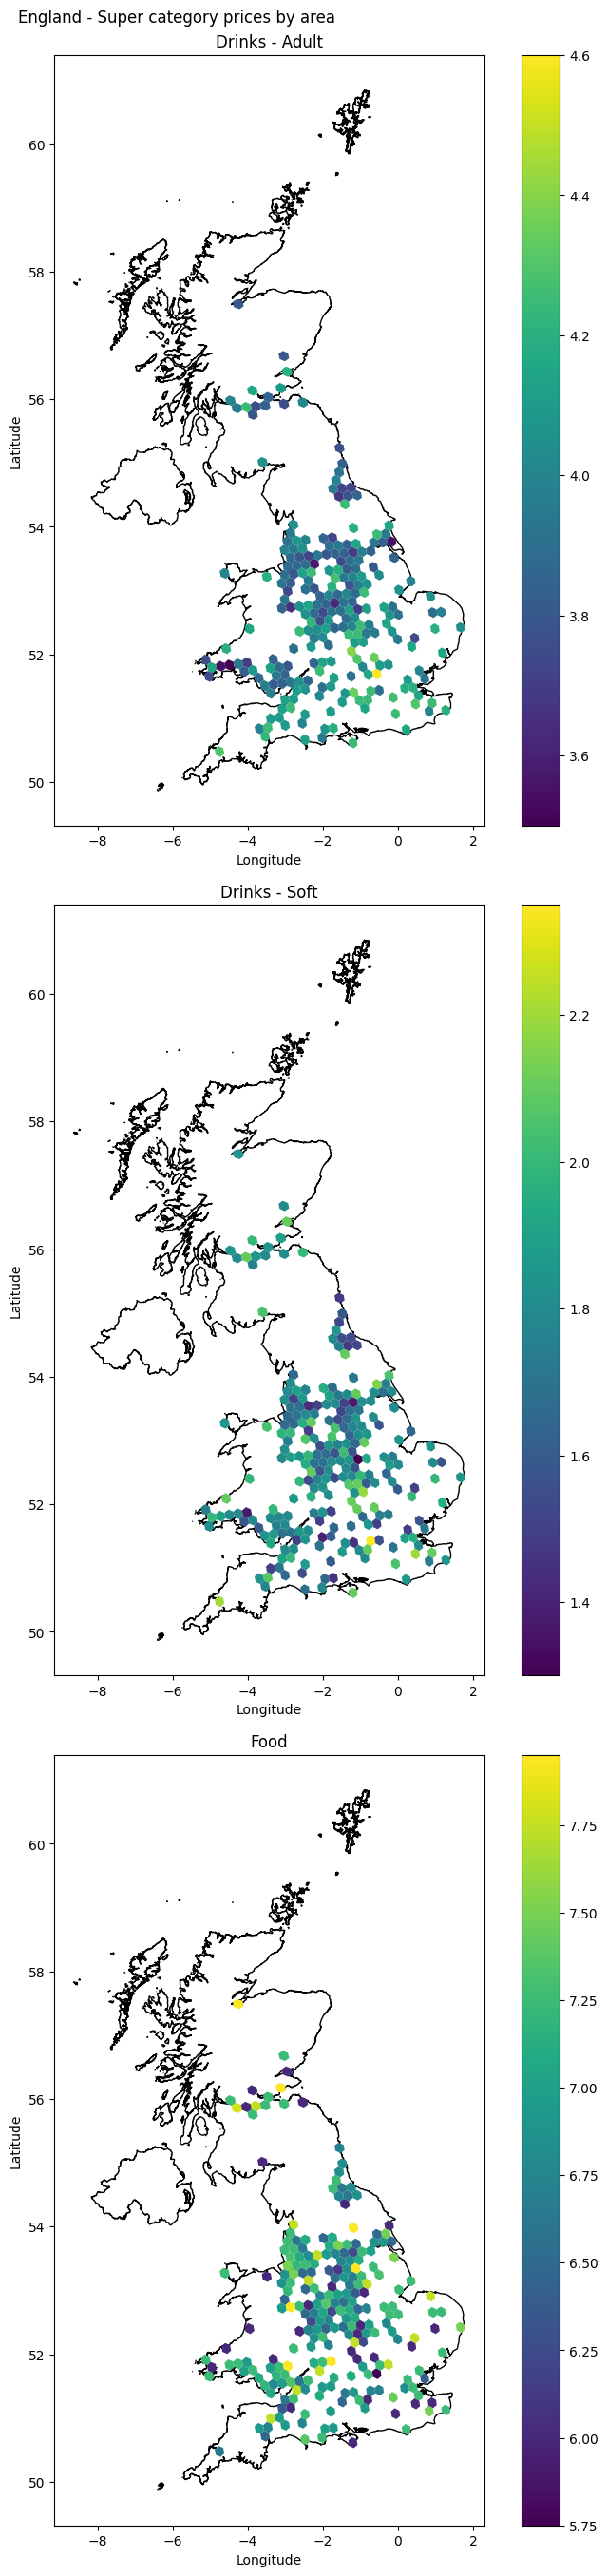

In [136]:
# PLOT IT
fig, axs = plt.subplots(nrows=3, constrained_layout=True, figsize=(9, 27), sharey=True)

# Formatting
plt.suptitle("England - Super category prices by area")

for ax, sup_cat in zip(axs, df.super_category.unique()):
  # Plot map
  uk.plot(
      color='white', edgecolor='black', ax=ax)
  # Plot hexagons
  hexagons[hexagons.super_category == sup_cat].plot(column='price', ax=ax, legend=True)

  ax.set_title(sup_cat)
  ax.set_ylabel("Latitude")
  ax.set_xlabel("Longitude")
# fig.savefig("./plots/house_price_map.png")
fig.show()

## Location
Look at the georaphic spread of locations

C:\Users\robert.franklin\AppData\Local\Temp\ipykernel_5184\4016174843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['h3_polyfill'] = df.apply(geo_to_h3, axis=1)


<Axes: xlabel='Longitude'>

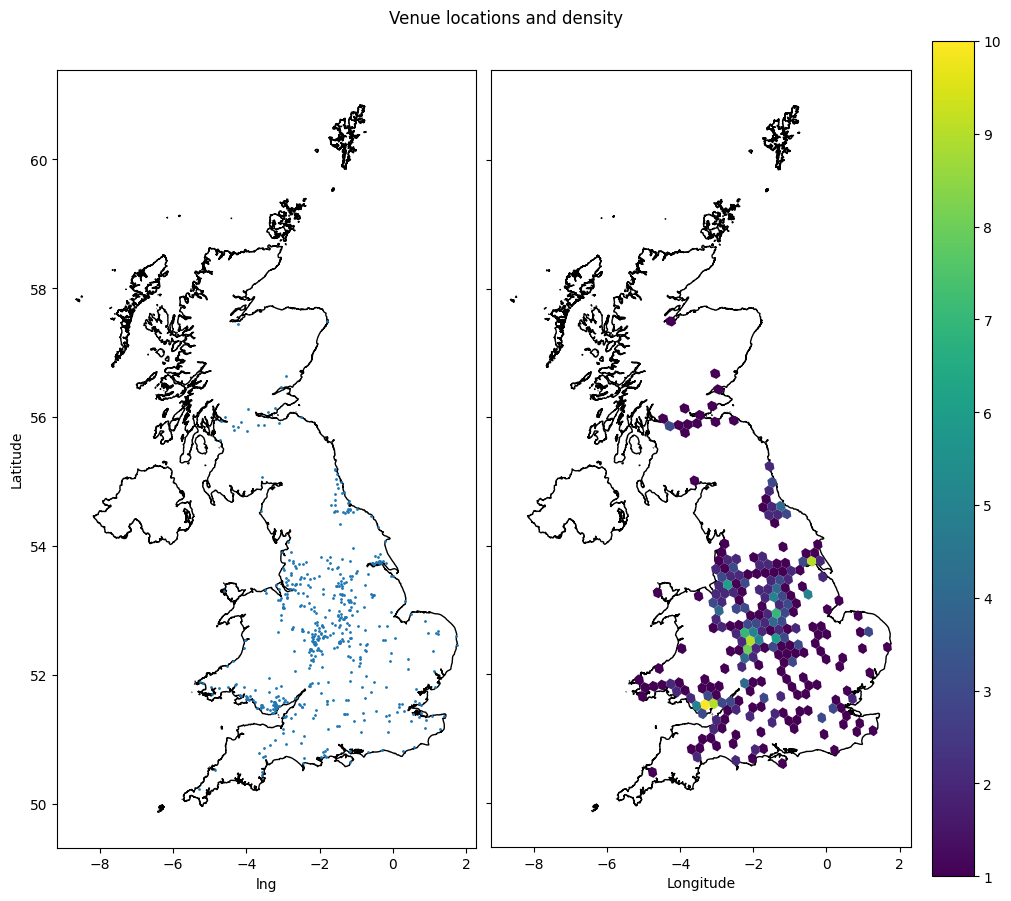

In [137]:

df = address_df[["venue_id", "lat", "lng"]]
df['h3_polyfill'] = df.apply(geo_to_h3, axis=1)
df = df.groupby(['h3_polyfill'], as_index=False).agg({'venue_id':'count'}) \
    [["venue_id", "h3_polyfill"]].rename(columns={"venue_id": "num_venues"})

# Get hexagons for venues
uk = geopandas.read_file("uk_geo.json")
hexagons = uk.h3.polyfill_resample(resolution)
# Join to mapped data
hexagons = pd.merge(hexagons, df, on="h3_polyfill", how="left")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 9), sharey=True, constrained_layout=True)
# Formatting
plt.suptitle("Venue locations and density")
# Plot map
uk.plot(
    color='white', edgecolor='black', ax=ax1)
uk.plot(
    color='white', edgecolor='black', ax=ax2)
# Plot as scatter
address_df.plot.scatter(x="lng", y="lat", ax=ax1, s=1)
ax1.set_ylabel("Latitude")
ax2.set_xlabel("Longitude")
# Plot hexagons
hexagons.plot(column='num_venues', ax=ax2, legend=True)

## Hours
    - Distribution of hours - eat in
    - Distribution of hours - take away (inc lead time and pickup time)
    - Distribution of hours - by location

In [172]:
from datetime import datetime, time, date, timedelta
takeaway_hours_df = pd.read_parquet(f"{base_dir}/data/processed/takeaway_hours.parquet")
eatin_hours_df = pd.read_parquet(f"{base_dir}/data/processed/eatin_hours.parquet")
# Limit to only where enabled
takeaway_hours_df = takeaway_hours_df[takeaway_hours_df.is_enabled == True]
eatin_hours_df = eatin_hours_df[eatin_hours_df.is_enabled == True]

In [173]:
# How many venues offer takeaway (how much can we trust this data?)
print(f"{takeaway_hours_df.venue_id.nunique():,}/{eatin_hours_df.venue_id.nunique():,} venues offer takeaway")

2/353 venues offer takeaway


In [174]:
# Convert open/close to hours open
def hour_conv(df):
    df["open"] = [datetime.strptime(str(o), "%H:%M:%S") for o in df["open"]]
    df["close"] = [datetime.strptime(str(o), "%H:%M:%S") for o in df["close"]]
    df["hours"] = [td.seconds / 3600 for td in df.open - df.close]
    return df
takeaway_hours_df = hour_conv(takeaway_hours_df)
eatin_hours_df = hour_conv(eatin_hours_df)

C:\Users\robert.franklin\AppData\Local\Temp\ipykernel_5184\3869702755.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


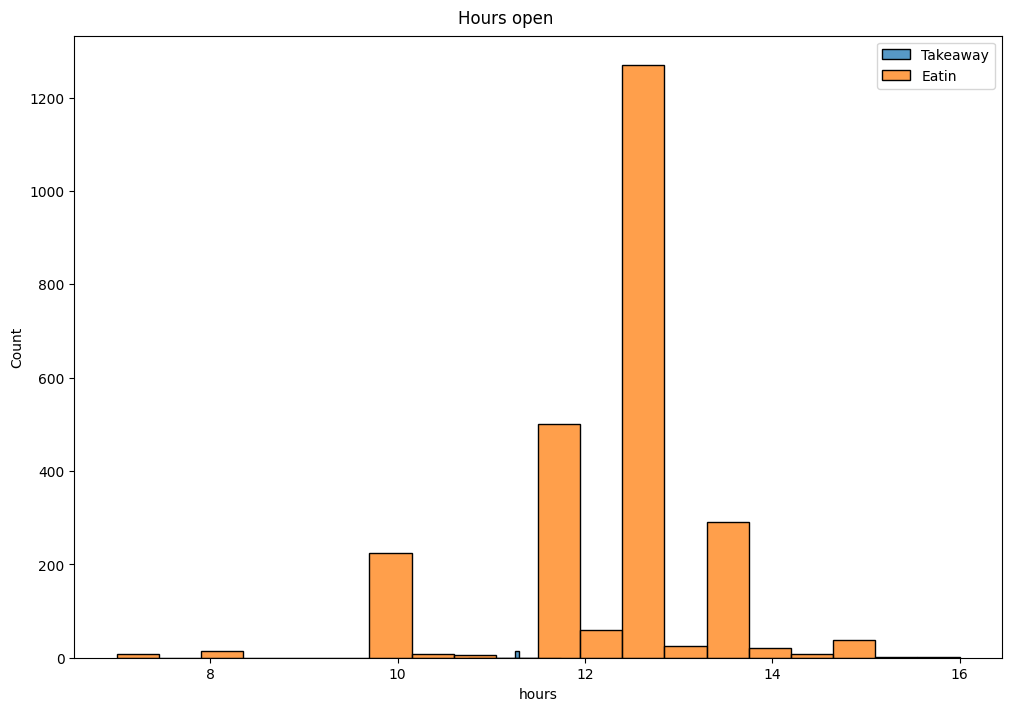

In [181]:
# What is the distribution of hours open
fig, ax = plt.subplots(nrows=1, constrained_layout=True, figsize=(10,7))
# Formatting
plt.suptitle("Hours open")
# Plot hist
sns.histplot(data=takeaway_hours_df, x="hours", ax=ax, bins=20, label="Takeaway")
sns.histplot(data=eatin_hours_df, x="hours", ax=ax, bins=20, label="Eatin")
ax.legend()
fig.show()

In [176]:
# Days open
eatin_hours_df.groupby("day") \
    .agg({"venue_id": "count"}) \
    .rename(columns={"venue_id": "num_venues"})
# All venues open all days

,num_venues
day,
friday,353
monday,353
saturday,353
sunday,353
thursday,353
tuesday,353
wednesday,353


C:\Users\robert.franklin\AppData\Local\Temp\ipykernel_5184\3051574093.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


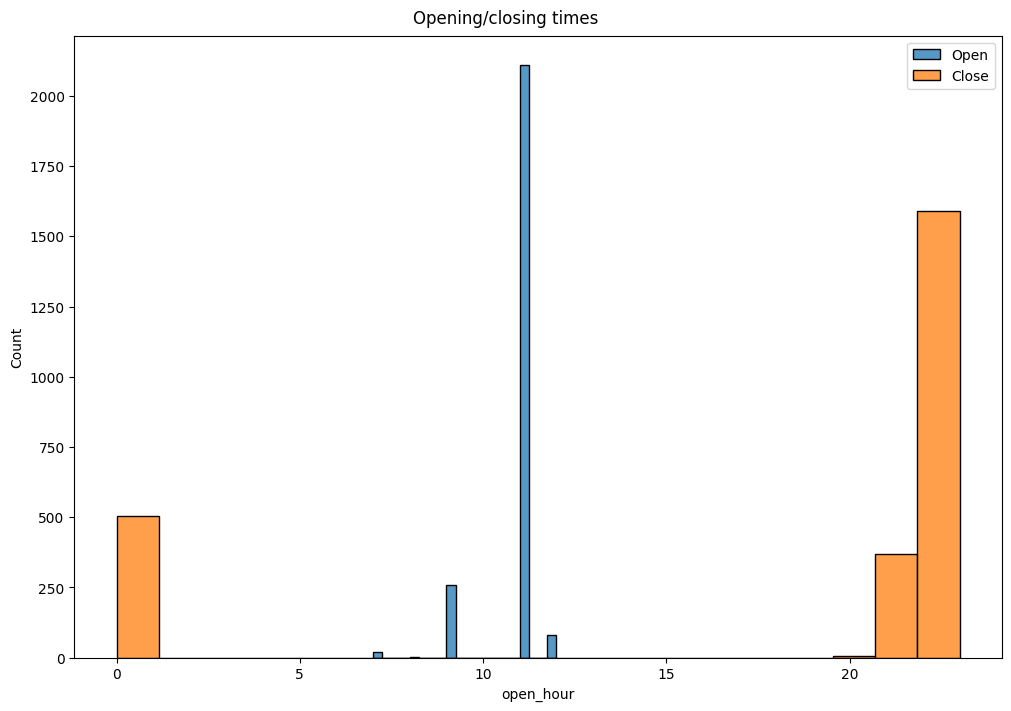

In [180]:
# What are the opening and closing times
fig, ax = plt.subplots(nrows=1, constrained_layout=True, figsize=(10,7))
# Formatting
plt.suptitle("Opening/closing times")
# Plot hist
eatin_hours_df["open_hour"] = [o.hour for o in eatin_hours_df["open"]]
eatin_hours_df["close_hour"] = [c.hour for c in eatin_hours_df["close"]]
sns.histplot(data=eatin_hours_df, x="open_hour", ax=ax, bins=20, label="Open")
sns.histplot(data=eatin_hours_df, x="close_hour", ax=ax, bins=20, label="Close")
# eatin_hours_df.close.plot.hist(ax=ax, bins=20, label="Close")
ax.legend()
fig.show()